In [1]:
# %matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from numinteg_tools import euler, rk2, Fields

# Equazioni differenziali hamiltoniane

Prendiamo un sistema meccanico, per esempio una particella nello spazio tridimensionale. Ad un dato tempo $t$ la particella si troverà in una data posizione, identificata da tre variabili, le tre coordinate spaziali $x^1, x^2, x^3$. La particella però potrebbe essere in movimento, e per determinare la posizione ad un istante successivo abbiamo bisogno di conoscere anche la velocità della particella; in effetti in meccanica hamiltoniana lo stato di moto della particella viene indicato, invece che tramite la sua velocità, tramite altre 3 variabili, le 3 componenti della sua quantità di moto $p^1, p^2, p^3$. Diciamo che il sistema composto da una tale particella ha $3$ gradi di libertà.

In generale un sistema meccanico potrà essere composto da più particelle (diciamo $N$ particelle), e avere quindi $3N$ gradi di libertà, corrispondenti quindi a $3N$ variabili posizione e $3N$ variabili quantità di moto (3 per ogni particella). Mettiamo insieme tutte le variabili, ottenendo due vettori di $3N$ componenti

$$
\vec{x} = \left(x^1,\dots,x^{3N}\right) \qquad \vec{p} = \left(p^1,\dots,p^{3N}\right)
$$

che descrivono totalmente lo stato. Usando queste variabili possiamo definire la funzione **hamiltoniana** del sistema, che rappresenta i valori dell'energia meccanica in funzione di posizione e velocità di ogni singola componente del sistema stesso

$$
H(x^1,\dots,x^{3N}; p^1,\dots,p^{3N}) = H(\vec x; \vec p)
$$

Le **equazioni di Hamilton** sono equazioni differenziali (del primo ordine) che permettono di determinare l'evoluzione temporale delle variabili $x_i$ e $p_i$ a partire dalla funzione hamiltoniana $H$:

$$
\left\{\begin{array}{ccl}
\dot x^k &=& \frac{\partial H}{\partial p^k}\\
\dot p^k &=& - \frac{\partial H}{\partial x^k}
\end{array}\right.
$$

Possiamo scrivere questo sistema in forma vettoriale

$$
\left\{\begin{array}{ccl}
\dot \vec x &=& \frac{\partial H}{\partial \vec p}\\
\dot \vec p &=& - \frac{\partial H}{\partial \vec x}
\end{array}\right.
$$

laddove la derivata parziale **rispetto ad un vettore** $\frac{\partial}{\partial \vec x}$ viene definita come un vettore che ha come componenti le derivate 

$$\frac{\partial}{\partial \vec x} \doteq \left(\frac{\partial}{\partial x^1},\frac{\partial}{\partial x^2},\dots\right)$$

Possiamo pensare di utilizzare gli algoritmi studiati precedentemente per poter determinare numericamente l'evoluzione temporale delle variabili che descrivono lo stato del sistema, avvantaggiandoci con le operazioni vettoriali di ```numpy```.

### Integratori simplettici

Con l'espressione **integrazione simplettica** si intende una intera famiglia di algoritmi di risoluzione di equazioni differenziali (_integrazione_) che hanno la proprietà di rispettare la struttura geometrica alla base delle equazioni di Hamilton. Ciò fa sì che le soluzioni determinate numericamente siano più vicine, globalmente, alle soluzioni "esatte" (che ovviamente non siamo in grado di determinare analiticamente, visto che abbiamo bisogno dell'integrazione numerica).

Noi tratteremo solo il caso più semplice di **integratore simplettico**, per evidenziare principi e proprietà.

Partiamo da un sistema di equazioni hamiltoniane come quello qui sopra. Per semplicità consideriamo un sistema con un solo grado di libertà, usando il formalismo vettoriale sarà immediato estendere l'algoritmo al caso generale. 

Discretizziamo l'intervallo temporale di interesse come abbiamo fatto in precedenza:

$$
t_0, t_1 = t_0 + \Delta t, t_2 = t_1 + \Delta t, \dots , t_N = t_{N-1} + \Delta t  
$$

L'algoritmo di Euler in avanti prescriverebbe questo aggiornamento:

$$
\left\{\begin{array}{ccl}
p_{n+1} &=& p_n - \Delta t \frac{\partial H}{\partial x}(x_n, p_n) \\
x_{n+1} &=& x_n + \Delta t \frac{\partial H}{\partial p}(x_n, p_n) \\
\end{array}\right.
$$

L'integratore simplettico invece prescrive di fare un aggiornamento _intermedio_ della sola della quantità di moto $p$, e poi usare questo aggiornamento intermedio per aggiornare posizione e quantità di moto. L'aggiornamento intermedio di $p$ viene utilizzato solo come punto di partenza per l'aggiornamento finale. In formule:

$$
\left\{\begin{array}{ccl}
p^\ast_n &=& p_n - \frac{\Delta t}{2} \frac{\partial H}{\partial x}(x_n, p_n) \\
x_{n+1} &=& x_n + \Delta t \frac{\partial H}{\partial p}(x_n, p^\ast_n) \\
p_{n+1} &=& p^\ast_n - \frac{\Delta t}{2} \frac{\partial H}{\partial x}(x_{n+1}, p^\ast_n) \\
\end{array}\right.
$$

Leggiamo una riga per volta:

1. Viene definita (al tempo $t_n$) una variabile ausiliaria $p^ast_n$ che rappresenta un valore intermedio che useremo per calcolare i successivi, ottenuto aggiornando la quantità di moto iniziale $p_n$, ma usando un passo temporale ridotto a metà $\frac{\Delta t}{2}$
$$
p^\ast_n = p_n - \frac{\Delta t}{2} \frac{\partial H}{\partial x}(x_n, p_n)
$$
2. Usando la posizione iniziale $x_n$ e la quantità di moto _intermedia_ $p^\ast_n$ aggiorniamo la variabile posizione ottenendo $x_{n+1}$ (notare che calcoliamo il membro di destra in $x_n$ e $p^\ast_n$)
$$
x_{n+1} = x_n + \Delta t \frac{\partial H}{\partial p}(x_n, p^\ast_n)
$$
3. Usando la posizione aggiornata $x_{n+1}$ e la quantità di moto _intermedia_ $p^\ast_n$ aggiorniamo (con passo temporale dimezzato $\frac{\Delta t}{2}$) la quantità di moto ottenendo il valore di $p_{n+1}$ (calcoliamo il membro di destra in $x_{n+1}$ e $p^\ast_n$)
$$
p_{n+1} = p^\ast_n - \frac{\Delta t}{2} \frac{\partial H}{\partial x}(x_{n+1}, p^\ast_n)
$$

> Notare che nel primo e nel terzo passo abbiamo usato un passo temporale dimezzato $\frac{\Delta t}{2}$, mentre nel secondo usiamo il passo intero $\Delta t$.

Per via dell'aggiornamento "_sfalsato_" e quindi asimmetrico delle variabili posizione e quantità di moto, siamo costretti ad una implementazione che non è una semplice estensione degli algoritmi precedenti: in particolare dobbiamo fare differenza tra variabili posizione e variabili quantità di moto.

Una implementazione dell'algoritmo di integrazione simplettico che sia compatibile con le precedenti ```euler``` e ```rk2``` potrebbe essere della seguente forma:

In [3]:
def symplectic_naif(x0, ts, f):
    """Algoritmo di integrazione simplettica (I ord.).
    Versione "naif", al solo scopo dimostrativo.
    
        symplectic_naif(x0, ts, f) -> restituisce un array numpy, con tante colonne quante sono le componenti 
                                      dell'array x(t), e una riga per ogni tempo t_k, con i valori previsti per
                                      le quantità x(t) regolate dall'equazione differenziale
                                      dx(t) / dt = f(x, t)
        
        x0 è la condizione iniziale (array o lista di valori iniziali); il numero di componenti di x0
           viene usato per dedurre il numero di equazioni del sistema. Le variabili di indice pari sono 
           le posizioni, quelle di indice dispari sono le quantità di moto.
        ts array numpy contenente i tempi della discretizzazione; la lunghezza di questo array sarà
           uguale alla lunghezza della simulazione.
        f  funzione che dà la velocità di variazione delle quantità x(t); deve essere una funzione che 
           accetta due variabili, x e t, la prima un array o lista di valori delle componenti di x(t) 
           (quindi con la stessa lunghezza del vettore delle condizioni iniziali), e la seconda uguale 
           al tempo al quale viene calcolata la velocità.
           """
        
    # inizializza l'array dei valori calcolati
    xs = np.zeros(shape=(len(ts), len(x0)), dtype=np.float)
    
    # condizione iniziale -> primo elemento dell'array
    xs[0] = x0
    
    i = 0
    while i<len(ts)-1:                       # ciclo sui tempi
        dt = ts[i+1] - ts[i]                 # ampiezza dell'intervallo di tempo (in linea di principio può essere non costante)
        
        # primo stadio, calcola l'impulso ausiliario al tempo intermedio
        v1 = f(xs[i], ts[i])
        v1[0::2] = 0                  # annulliamo le componenti posizione calcolate
        xstar = xs[i] + v1 * dt / 2   # aggiornamento
        
        # secondo stadio, determina l'update della posizione anche in funzione dell'impulso ausiliario
        v2 = f([xs[i, 0], xstar[1]], ts[i])
        v2[1::2] = 0
        xstar = xstar + v2 * dt
        
        # ultimo stadio, determina l'update definitivo della quantità di moto
        v3 = f(xstar, ts[i])
        v3[0::2] = 0
        xs[i+1] = xstar + v3 * dt / 2 
        
        i += 1
        
    return xs

Si nota dall'implementazione precedente che vengono compiute delle operazioni aggiuntive, in particolare vengono calcolate anche le posizioni insieme alle quantità di moto nel primo passo (intermedio), e poi i risultati vengono cancellati; analogamente per gli altri passi.

Sarebbe opportuno quindi implementare in maniera differente l'algoritmo: se eventualmente abbiamo necessità di conservare la compatibilità possiamo sempre pensare a scrivere una funzione "interfaccia" che conservi la forma (con qualche convenzione per distinguere le variabili posizione da quelle quantità di moto) e internamente chiami il nuovo integratore. Per esempio:

In [4]:
def symplectic(x0, p0, ts, fx, fp):
    """Algoritmo di integrazione simplettica (I ord.).
    
        symplectic(x0, ts, f) -> restituisce un array numpy, con tante colonne quante sono le componenti 
                                 dell'array x(t), e una riga per ogni tempo t_k, con i valori previsti per
                                 le quantità x(t) regolate dall'equazione differenziale
                                 dx(t) / dt = f(x, t)
        
        x0 è la condizione iniziale (array o lista di valori iniziali) per le variabili posizione; il numero 
           di componenti di x0 viene usato per dedurre il numero di equazioni del sistema per le variabili posizione. 
        p0 è la condizione iniziale (array o lista di valori iniziali) per le variabili posizione; il numero 
           di componenti di p0 viene usato per dedurre il numero di equazioni del sistema per le variabili impulso. 
        ts array numpy contenente i tempi della discretizzazione; la lunghezza di questo array sarà
           uguale alla lunghezza della simulazione.
        fx funzione che dà la velocità di variazione delle variabili posizione x(t); deve essere una 
           funzione che accetta tre variabili, x p e t, la prima un array o lista di valori delle componenti 
           di x(t) (quindi con la stessa lunghezza del vettore delle condizioni iniziali), la seconda un array 
           o lista di valori delle componenti di p(t)e la terza uguale al tempo al quale viene calcolata la velocità.
        fp funzione che dà la velocità di variazione delle variabili quantità di moto p(t); deve essere una 
           funzione che accetta tre variabili, x p e t, la prima un array o lista di valori delle componenti 
           di x(t) (quindi con la stessa lunghezza del vettore delle condizioni iniziali), la seconda un array 
           o lista di valori delle componenti di p(t)e la terza uguale al tempo al quale viene calcolata la velocità.
           """
        
    # inizializza l'array dei valori calcolati per le x
    xs = np.zeros(shape=(len(ts), len(x0)), dtype=np.float)
    
    # inizializza l'array dei valori calcolati per le p
    ps = np.zeros(shape=(len(ts), len(p0)), dtype=np.float)
    
    # condizione iniziale -> primo elemento dell'array
    xs[0] = x0
    ps[0] = p0
    
    i = 0
    while i<len(ts)-1:                       # ciclo sui tempi
        dt = ts[i+1] - ts[i]                 # ampiezza dell'intervallo di tempo (in linea di principio può essere non costante)
        
        # primo stadio, calcola l'impulso ausiliario al tempo intermedio
        v1 = fp(xs[i], ps[i], ts[i])

        pstar = ps[i] + v1 * dt / 2   # aggiornamento
        
        # secondo stadio, determina l'update della posizione anche in funzione dell'impulso ausiliario
        v2 = fx(xs[i], pstar, ts[i])
        xs[i+1] = xs[i] + v2 * dt
        
        # ultimo stadio, determina l'update definitivo della quantità di moto
        v3 = fp(xs[i+1], pstar, ts[i])
        ps[i+1] = pstar + v3 * dt / 2 
        
        i += 1
        
    return xs, ps

#### Confronto

Confrontiamo l'algoritmo simplettico con il nostro algoritmo multistadio ```rk2``` su un problema semplice, l'oscillatore armonico. Prima di tutto l'hamiltoniana (funzione energia meccanica):

$$
H(x, p) = \frac{p^2}{2m} + \frac{k}{2} x^2
$$

Da questa scriviamo le nostre equazioni differenziali:

$$
\left\{\begin{array}{ccl}
\dot x &=& \frac{\partial H}{\partial p} = \frac{p}{m}\\
\dot p &=& -\frac{\partial H}{\partial x} = -k x\\
\end{array}\right.
$$

> Per semplicità di implementazione poniamo la massa della particella pari a $1$, e di conseguenza avremo 
$$
\omega^2 = \frac{k}{m} = k
$$

Per poter integrare numericamente queste equazioni allora definiamo le funzioni (in Python) che implementano i membri destri di queste equazioni differenziali:

In [5]:
def harmonic_x(ω):
    def wrap(x, p, t):
        return np.array(p)
    
    return wrap

def harmonic_p(ω):
    def wrap(x, p, t):
        return np.array(-ω**2*x)
    
    return wrap

Per quanto riguarda l'algoritmo ```rk2``` possiamo usare la funzione definita nella scorsa lezione (si trova nel file ```numinteg_tools.py``` in questa directory, lo includiamo come metodo statico all'interno dell'oggetto ```Fields```):

```python
def harmonic(ω):
    def wrap(x, t):
        return np.array([x[1], - ω**2 * x[0]])

    return wrap
```

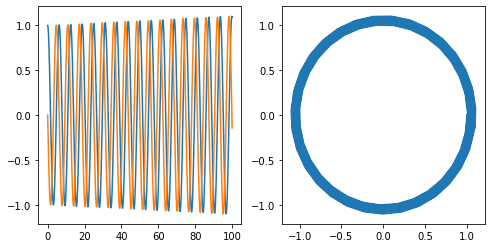

In [6]:
ω = 1.0
ts = np.linspace(0, 100, 500)
xs_rk = rk2([1, 0], ts, Fields.harmonic(ω)) # Usiamo il metodo statico della classe Fields importata da numinteg_tools.py

fig1, ax1 = plt.subplots(ncols=2, figsize=(8, 4))
ax1[0].plot(ts, xs_rk)
ax1[1].plot(xs_rk[:, 0], xs_rk[:, 1]);

Notiamo che, nel lungo periodo e se usiamo un passo temporale non piccolissimo, l'integrazione numerica soffre di un piccolo _drift_ simile a quello dell'algoritmo di Euler. Proviamo invece l'integratore simplettico, con la stessa discretizzazione temporale:

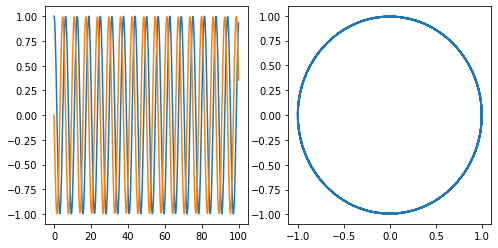

In [7]:
ts = np.linspace(0, 100, 500)
xs, ps = symplectic([1], [0], ts, harmonic_x(ω), harmonic_p(ω=1.0))

fig2, ax2 = plt.subplots(ncols=2, figsize=(8, 4))
ax2[0].plot(ts, xs)
ax2[0].plot(ts, ps)
ax2[1].plot(xs, ps);

Pur avendo usato un passo temporale uguale a quello dell'integratore ```rk2``` otteniamo un risultato molto più adeguato, senza accenni di deriva. Collegandoci con le lezioni possiamo valutare l'area racchiusa all'interno dell'orbita. Questa si ottiene (come abbiamo visto a lezione) tramite una somma che possiamo ricavare dai dati $\left\{x_k\right\}$ e $\left\{p_k\right\}$:

$$
\mathcal A_{rett} = \sum_k p_k \cdot (x_{k+1} - x_k)
$$

In pratica determiniamo l'area di ogni rettangolo di base $x_{k+1} - x_k$ e altezza $p_k$, e poi sommiamo tutte le aree. Una approssimazione migliore è quella detta "dei trapezi", che prescrive di determinare l'area dei trapezi rettangoli la cui altezza è $x_{k+1} - x_k$ (corrispondente alla base dei rettangoli del metodo precedente) e le cui basi siano $p_k$ e $p_{k+1}$.

$$
\mathcal A_{trap} = \sum_k \frac{p_k + p_{k+1}}{2} \cdot (x_{k+1} - x_k)
$$

In entrambi i casi la somma va effettuata su tutti i valori di interesse: per esempio se si vuole determinare l'area di un'orbita intera si prenderà una _slice_ di array che corrisponde ad una orbita completa. Una variabile però interessante è quella che ci permette di calcolare l'area sotto una parte dell'orbita, che si calcola considerando nella sommatoria vista sopra solo la parte di dati corrispondenti a quel dato segmento di orbita. Possiamo implementarlo in Python con una funzione come la seguente, che accetta in ingresso gli array delle posizioni e delle quantità di moto della parte di orbita che ci interessa, e restituisce un array i cui valori siano le aree spazzate in corrispondenza di ogni punto dell'orbita, mostrandoci quindi come cresce l'area compresa nell'orbita **mentre** percorriamo l'orbita stessa. 

In [8]:
def area(qs, ps):
    """Area calcolata con il metodo dei trapezi. Restituisce un array di valori."""
    return np.cumsum(np.diff(qs, axis=0) * (ps[1:]+ps[:-1])/2)

Possiamo vedere allora come cresce quest'area nei due casi presi in esame:

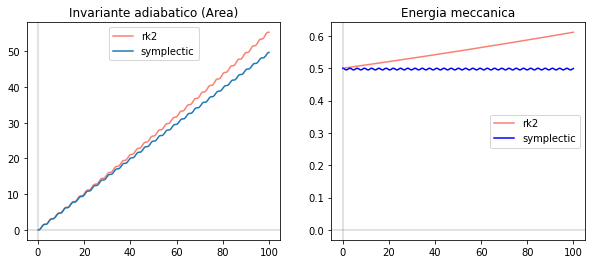

In [9]:
fig3, ax3 = plt.subplots(ncols=2, figsize=(10, 4))

ax3[0].plot(ts[1:], area(xs_rk[:, 0], xs_rk[:, 1]), 'salmon', label='rk2')
ax3[0].plot(ts[1:], area(xs, ps), label='symplectic')

ax3[0].set(title='Invariante adiabatico (Area)')
ax3[0].axhline(0, color='gray', alpha=0.3)
ax3[0].axvline(0, color='gray', alpha=0.3)
ax3[0].legend()

ax3[1].plot(ts, xs_rk[:, 0]**2/2 + xs_rk[:, 1]**2/2, 'salmon', label='rk2')
ax3[1].plot(ts, ps**2/2 + xs**2/2, 'blue', label='symplectic')


ax3[1].set(title='Energia meccanica')
ax3[1].axhline(0, color='gray', alpha=0.3)
ax3[1].axvline(0, color='gray', alpha=0.3)
ax3[1].legend()


Per l'algoritmo simplettico la crescita dell'area è lineare, quindi ha un tasso di crescita costante, mentre per l'altro algoritmo l'area cresce più velocemente. E' facile allora vedere che nel caso dell'algoritmo simplettico l'area di una singola orbita resta (approssimativamente) costante, mentre per ```rk2``` questa cresce (come abbiamo detto già in generale). Anche il grafico dell'energia ci permette di concludere che l'algoritmo simplettico ha migliori proprietà, infatti l'energia, pur fluttuando, resta molto vicina ad un valore costante (che è quello previsto per un oscillatore armonico di massa $m=1$ e costante elastica $k=1$ con elongazione $x_0 = 1$, cioè $E = \frac{1}{2} k x_0^2 = 0.5$), mentre per l'algoritmo ```rk2``` c'è una netta deriva dell'energia, che aumenta (ovviamente in maniera non fisica).

Possiamo stimare il periodo dell'oscillazione ricavata tramite integrazione simplettica determinando la pendenza media del grafico dell'invariante adiabatico nel limite asintotico, cioè tramite il grafico della funzione

$$
\frac{\mathcal A(t)}{t}
$$

Tale funzione tenderà al valore dell'energia meccanica dell'oscillatore armonico.

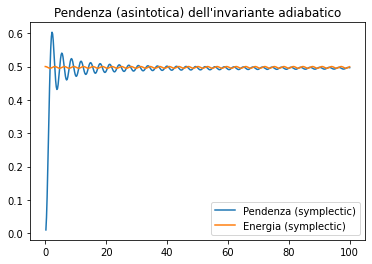

In [10]:
fig4, ax4 = plt.subplots()

ax4.set(title="Pendenza (asintotica) dell'invariante adiabatico")
ax4.plot(ts[1:], area(xs, ps)/ts[1:], label='Pendenza (symplectic)')
ax4.plot(ts, (ps**2 + xs**2)/2, label='Energia (symplectic)')
ax4.legend(loc='lower right')

Per confronto vediamo che la pendenza asintotica calcolata dall'integrazione numerica con il metodo ```rk2``` non si avvicina ad una costante:

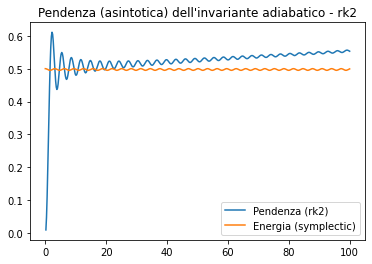

In [11]:
fig5, ax5 = plt.subplots()

ax5.set(title="Pendenza (asintotica) dell'invariante adiabatico - rk2")
ax5.plot(ts[1:], area(xs_rk[:, 0], xs_rk[:, 1])/ts[1:], label='Pendenza (rk2)')
ax5.plot(ts, (ps**2 + xs**2)/2, label='Energia (symplectic)')
ax5.legend()

Nello stesso grafico abbiamo mostrato sia la funzione $\frac{\mathcal A(t)}{t}$ sia l'energia meccanica calcolata con l'integrazione simplettica. Anche in questo caso è evidente la deriva.

> Per la nostra implementazione delle funzioni ```harmonic_x``` e ```harmonic_p``` possiamo fare un oscillatore armonico con più gradi di libertà, dove ogni grado di libertà ha una sua frequenza, semplicemente passando al parametro $\omega$ un array ```numpy``` di valori, come segue:

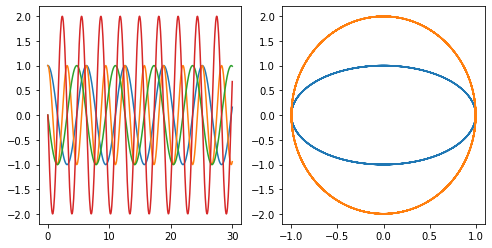

In [14]:
ω2 = np.array([1.0, 2.0])
ts = np.linspace(0, 30, 500)
xs2, ps2 = symplectic([1, 1], [0, 0], ts, harmonic_x(ω2), harmonic_p(ω2))

fig2, ax6 = plt.subplots(ncols=2, figsize=(8, 4))
ax6[0].plot(ts, xs2)
ax6[0].plot(ts, ps2)
ax6[1].plot(xs2, ps2);

In [20]:
def damped_oscillator_x(ω, β):
    def wrap(x, p, t):
        return np.array(p)

    return wrap

def damped_oscillator_p(ω, β):
    def wrap(x, p, t):
        return np.array(- ω**2 * x - β * p)

    return wrap

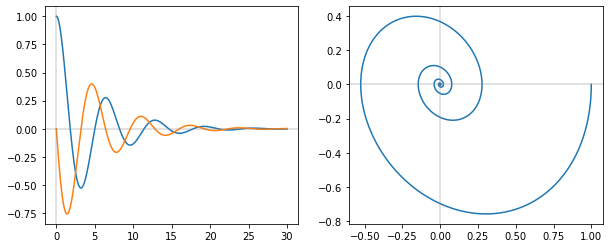

In [27]:
ω, β = 1.0, 0.4
ts = np.linspace(0, 30, 1000)
xs_d, ps_d = symplectic([1], [0], ts, damped_oscillator_x(ω, β), damped_oscillator_p(ω, β))

fig7, ax7 = plt.subplots(ncols=2, figsize=(10, 4))
ax7[0].plot(ts, xs_d)
ax7[0].plot(ts, ps_d)
ax7[0].axhline(0, color='grey', alpha=0.3)
ax7[0].axvline(0, color='grey', alpha=0.3)

ax7[1].plot(xs_d, ps_d)
ax7[1].axhline(0, color='grey', alpha=0.3)
ax7[1].axvline(0, color='grey', alpha=0.3)

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licenza Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Physics Club - Integrazione Numerica - integratore simplettico</span> di<span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName"> Mauro Riccardi</span> è distribuito con Licenza <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribuzione - Non commerciale - Condividi allo stesso modo 4.0 Internazionale</a>.